# Importing libaries 

The first step in this project is to import all the nessecary libaries for Data proprocessing, Text processing and Modeling

In [1]:
'Data processing'
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
from sklearn.preprocessing import LabelEncoder

'Text processing'
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import FunctionTransformer
import string
from nltk.stem import PorterStemmer, WordNetLemmatizer

'Modeling'
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud
from collections import Counter
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier


# Load the dataset

In [2]:
#In the code, the encoding parameter is set to 'latin1' because the dataset contains some special characters that are not supported by the default 'utf-8' encoding.
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning

In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
#from the original dataframe we will drop the columns that are not required in the analysis
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#next we will rename the columns to something more meaningful, such as 'target' (v1) and 'text' (v2)
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#initializing the label encoder
encoder = LabelEncoder()

In [8]:
# we are encoding the target column and replacing the spam and ham labels with 1 and 0 respectively.
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
# check for duplicate values
df.duplicated().sum()

403

In [11]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [12]:
df.shape

(5169, 2)

# Exploratory Data Analysis (EDA)

In [13]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

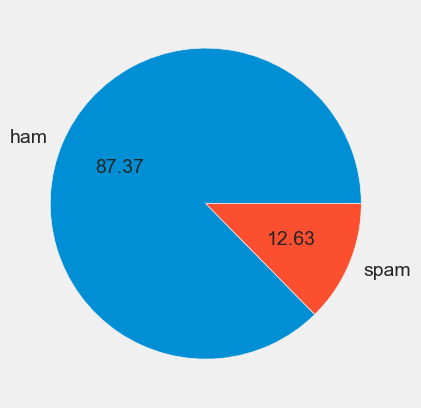

In [14]:
#visualizing the target column as a pie chart
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [15]:
#creating a new column to store the length of the text messages
df['text_len'] = df.text.apply(len)
df.head()

,target,text,text_len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
#creating a new column to store the number of words in each text message
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,text_len,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [17]:
#creating a new column to store the number of sentences in each text message
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,text_len,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:
#visualizing the distribution of the text length, number of words and number of sentences
df[['text_len','num_words','num_sentences']].describe()

,text_len,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


text_len: The length of the texts in the dataset has a count of 5169 entries. The minimum length is 2 characters, while the maximum length is 910 characters. The mean (average) length is approximately 78.98 characters, and the standard deviation is around 58.24.

num_words: The number of words in the texts ranges from 1 to 220 words. On average, there are approximately 18.45 words per text, with a standard deviation of 13.32. The 25th percentile indicates that 25% of the texts have 9 words or fewer, while the 75th percentile suggests that 25% of the texts have 26 words or more.

num_sentences: The number of sentences in the texts ranges from 1 to 28 sentences. The mean number of sentences per text is approximately 1.95, with a standard deviation of 1.36. The majority of the texts (50th percentile) have only 1 sentence, while 25% have 2 or more sentences.

In [19]:
#visualizing the distribution of the text length, number of words and number of sentences for ham messages
df[df['target'] == 0][['text_len','num_words','num_sentences']].describe()

,text_len,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [20]:
#visualizing the distribution of the text length, number of words and number of sentences for spam messages
df[df['target'] == 1][['text_len','num_words','num_sentences']].describe()

,text_len,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


For Ham Messages:

text_len: The average length of ham messages is approximately 70.46 characters, with a standard deviation of 56.36. The minimum and maximum lengths are 2 and 910 characters, respectively. The majority of ham messages have a length between 34 and 90 characters, as indicated by the interquartile range (25th percentile: 34 characters, 75th percentile: 90 characters).
num_words: On average, ham messages consist of approximately 17.12 words, with a standard deviation of 13.49. The number of words in ham messages ranges from 1 to 220. The interquartile range suggests that 25% of the ham messages have 8 or fewer words, while 25% have 22 or more words.
num_sentences: Ham messages typically contain an average of 1.80 sentences, with a standard deviation of 1.28. The number of sentences ranges from 1 to 28. The interquartile range shows that 50% of the ham messages have only 1 sentence, while 25% have 2 or more sentences.

For Spam Messages:

text_len: Spam messages have a longer average length compared to ham messages, with an average of approximately 137.89 characters. The standard deviation is 30.14, indicating a narrower spread of lengths compared to ham messages. The minimum and maximum lengths are 13 and 224 characters, respectively. The interquartile range suggests that 50% of the spam messages have a length between 132 and 157 characters.
num_words: The average number of words in spam messages is higher, approximately 27.67, with a standard deviation of 7.01. The number of words ranges from 2 to 46. The interquartile range indicates that 50% of the spam messages have between 25 and 32 words.
num_sentences: Spam messages tend to have more sentences on average, approximately 2.97 sentences, with a standard deviation of 1.48. The number of sentences ranges from 1 to 8. The interquartile range shows that 50% of the spam messages have 3 or more sentences.

In summary, spam messages generally have longer lengths, more words, and more sentences compared to ham messages. They exhibit a higher variability in terms of text length, word count, and sentence count.

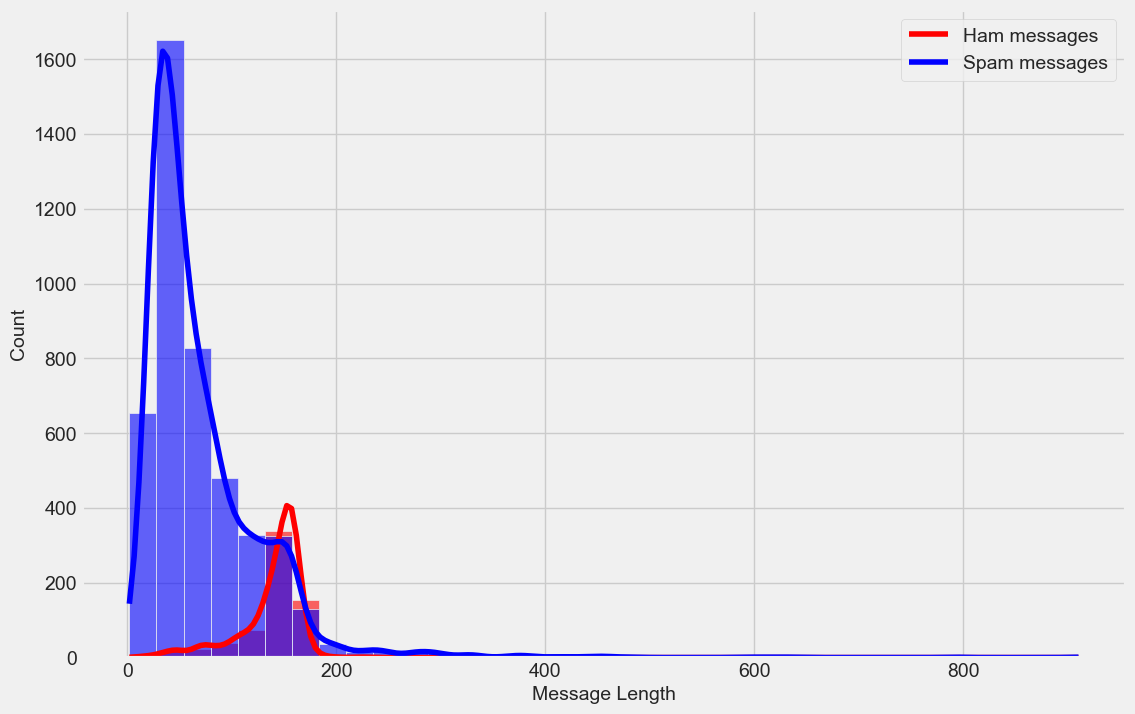

In [21]:
#visualizing the distribution of the message lengths for ham and spam messages using histograms.
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='text_len', hue='target', bins=35, kde=True, palette=['blue', 'red'], alpha=0.6)

plt.legend(['Ham messages', 'Spam messages'])
plt.xlabel('Message Length')
plt.ylabel('Count')

plt.show()

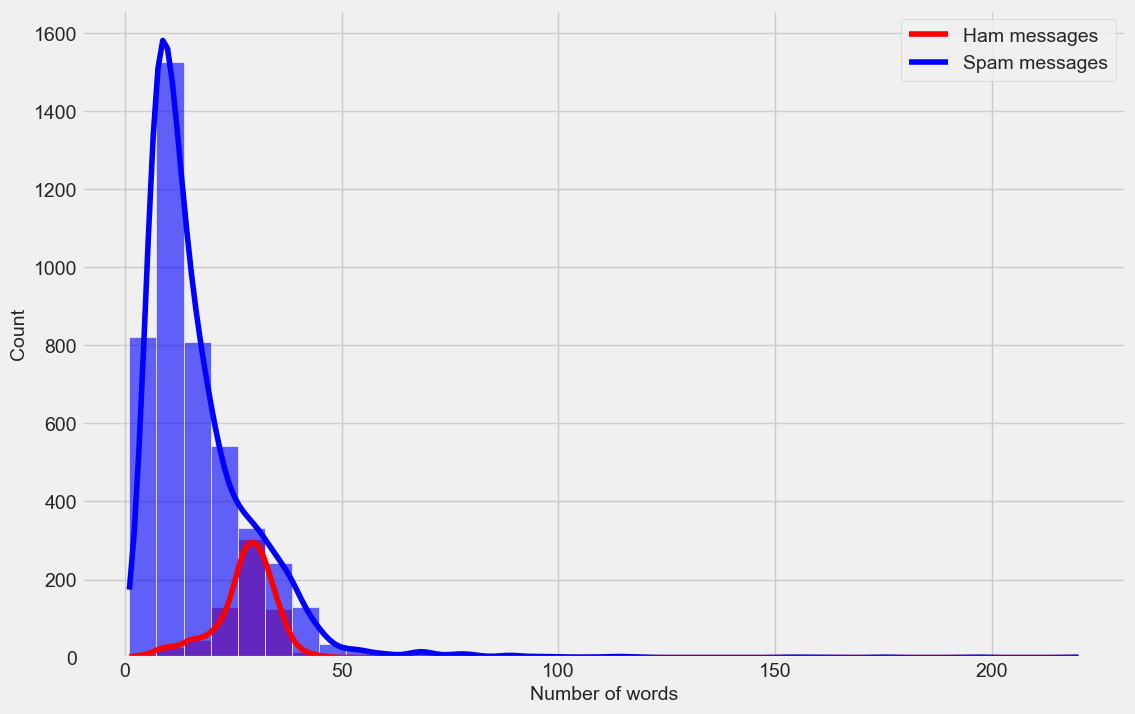

In [22]:
#visualizing the distribution of the number of words for ham and spam messages using histograms.
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='num_words', hue='target', bins=35, kde=True, palette=['blue', 'red'], alpha=0.6)

plt.legend(['Ham messages', 'Spam messages'])
plt.xlabel('Number of words')
plt.ylabel('Count')

plt.show()

Because spam messages have longer lengths, more words, and more sentences compared to ham messages, it's evident that they would have a higher count than ham messages 

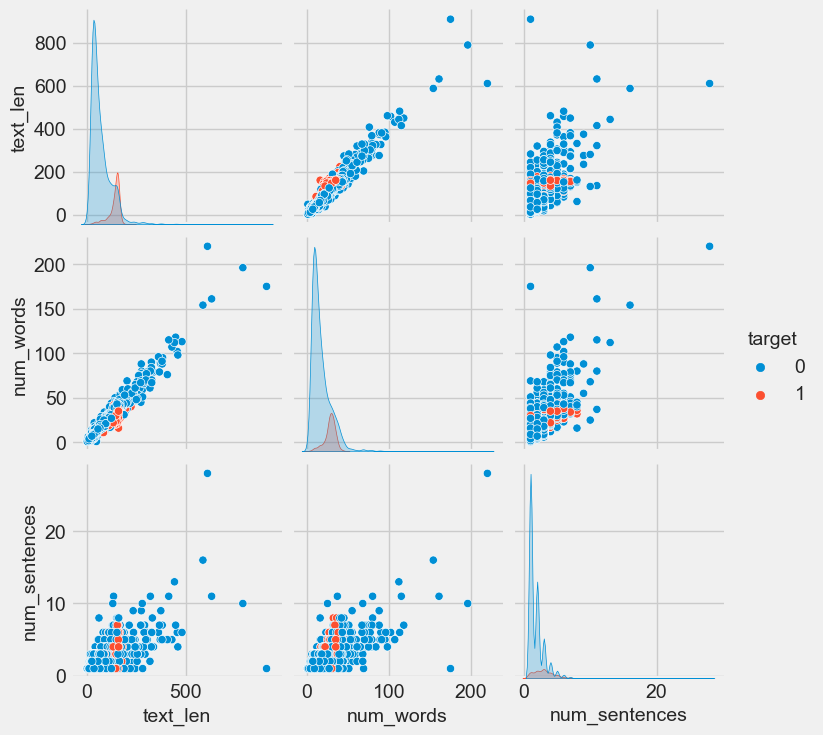

In [23]:
#visualizing a pairplot of the target column with the text length, number of words and number of sentences
sns.pairplot(df,hue='target')

C:\Users\arjun\AppData\Local\Temp\ipykernel_22692\248797783.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

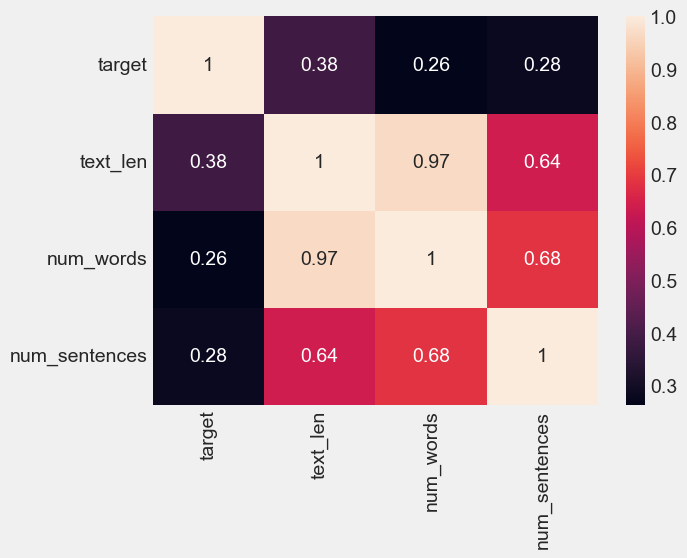

In [24]:
#visualizing the correlation between the text length, number of words and number of sentences
sns.heatmap(df.corr(),annot=True)

Based on the correlation values, we can infer that there is a positive relationship between the target variable and the length of the text messages, although it is not particularly strong. Additionally, there are strong positive relationships between the length of the text messages and the number of words, as well as between the number of words and the number of sentences in the messages.

# Data Preprocessing

In [25]:
#we are defining a function for a custom tokenizer class that will be used to tokenize the text messages
class Tokenizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return [word_tokenize(text) for text in X]

# we are defining a function for a custom stemmer class that will be used to stem the text messages
class Stemmer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        stemmer = PorterStemmer()
        return [[stemmer.stem(token) for token in tokens] for tokens in X]

# we are defining a function for a custom lemmatizer class that will be used to lemmatize the text messages
class Lemmatizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        lemmatizer = WordNetLemmatizer()
        return [[lemmatizer.lemmatize(token) for token in tokens] for tokens in X]

# we are defining a function for a custom preprocessor class that will be used to preprocess the text messages
class Preprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        stop_words = set(stopwords.words('english'))
        punctuation = set(string.punctuation)
        preprocessed = []
        
        for tokens in X:
            filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token not in punctuation and token.isalnum()]
            preprocessed.append(' '.join(filtered_tokens))
        
        return preprocessed


A pipeline is used to create a sequence of data processing steps that are applied to the input data. Each step in the pipeline represents a specific transformation or processing operation on the data.

In [26]:
# Create the pipeline for the classifier 
pipeline = Pipeline([
    ('tokenize', Tokenizer()),
    ('stem', Stemmer()),
    ('lemmatize', Lemmatizer()),
    ('preprocess', Preprocessor())
])

Here, a pipeline object is created using the Pipeline class from the sklearn.pipeline module. The pipeline is initialized with a list of tuples, where each tuple consists of a step name and a corresponding data processing object or function. The pipeline consists of the following steps:

*tokenize: This step uses the Tokenizer() object to tokenize the input text.
*stem: This step uses the Stemmer() object to perform stemming on the tokenized text.
*lemmatize: This step uses the Lemmatizer() object to perform lemmatization on the stemmed text.
*preprocess: This step uses the Preprocessor() object to perform additional preprocessing on the lemmatized text.

In [27]:
#we are testing the pipeline on a sample text message to see the output of each step in the pipeline 
text = "I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today."
preprocessed_text = pipeline.transform([text])[0]
print(preprocessed_text)

gon na home soon want talk thi stuff anymor tonight k cri enough today


As seen in the sample text, the pipeline that carries the text preprocessing works in using Natural Language Processing techniques in altering a text. A sample text message is assigned to the text variable. The pipeline is applied to the text by calling the transform() method on the pipeline object with the text as input. The transform() method sequentially applies each step in the pipeline to the input data.
The preprocessed text is obtained from the transformed result, and it is printed to the console.

The pipeline is applied to the 'text' column of a DataFrame called df. The transform() method is called on the pipeline object with the 'text' column as input.

The transformed texts are assigned to a new column called 'transformed_text' in the DataFrame df. Finally, the first few rows of the DataFrame are printed using df.head() to see the results of the transformation.

In [28]:
#we are applying the pipeline on the text column of the dataframe to preprocess all the text messages
df['transformed_text'] = pipeline.transform(df['text'])
df.head()

,target,text,text_len,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail onli bugi n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


##### 'In this part we are creating a wordcloud for the spam and ham messages to visualize the most frequent words in each category.'


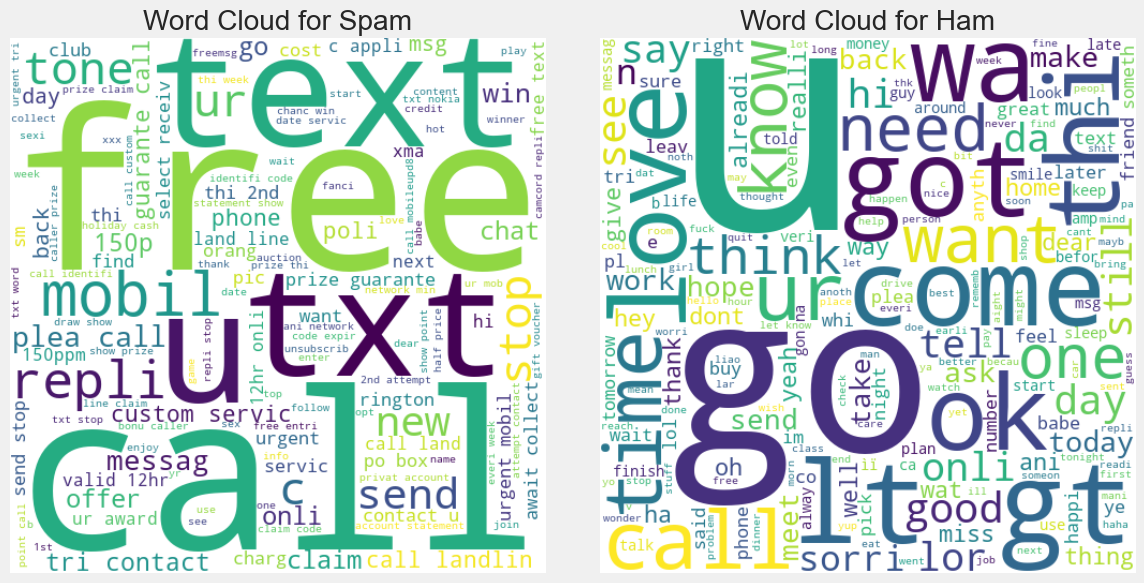

In [29]:

# Create WordCloud object
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Generate word cloud for 'spam'
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

# Create a subplot for the 'spam' word cloud
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Word Cloud for Spam')
plt.axis('off')

# Generate word cloud for 'ham'
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

# Create a subplot for the 'ham' word cloud
plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Word Cloud for Ham')
plt.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Display the word clouds
plt.show()

In [30]:
#we are creating a list of all the words in the spam messages
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [31]:
#next we are counting the number of times each word appears in the spam messages and storing the results in a dictionary. We are only using the 30 most common words.
word_counts = Counter(spam_corpus)
most_common_words = word_counts.most_common(30)

In [32]:
# we are creating a dataframe to store the most common words in the spam messages
word_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

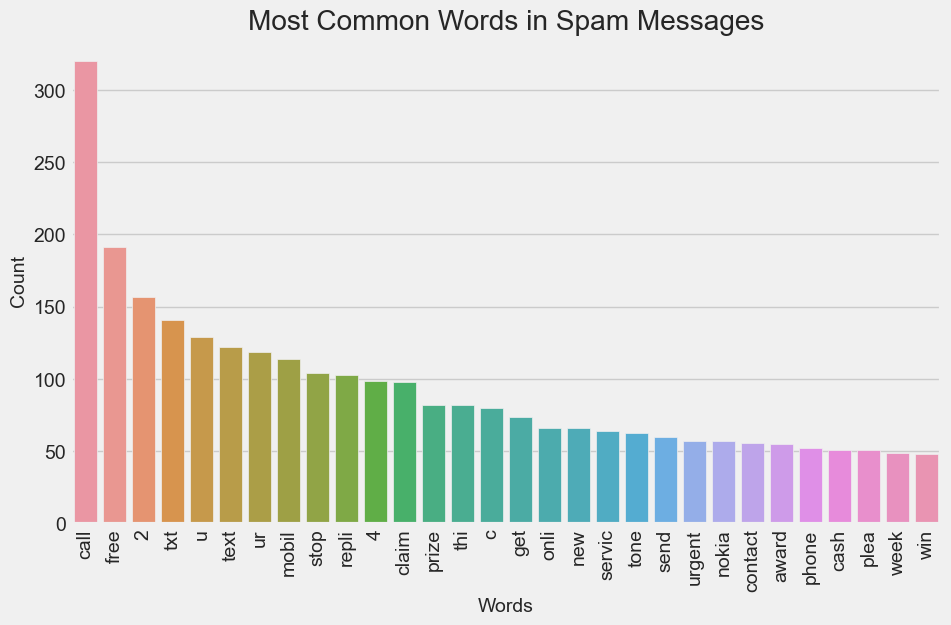

In [33]:
#now we are visualizing the most common words in the spam messages using a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=word_df)
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Most Common Words in Spam Messages')
plt.show()

In [34]:
#we are creating a list of all the words in the ham messages
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [35]:
#next we are counting the number of times each word appears in the spam messages and storing the results in a dictionary. We are only using the 30 most common words.
word_counts = Counter(ham_corpus)
top_words = word_counts.most_common(30)

In [36]:
# Create a DataFrame from the top words and their frequencies
df_top_words = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

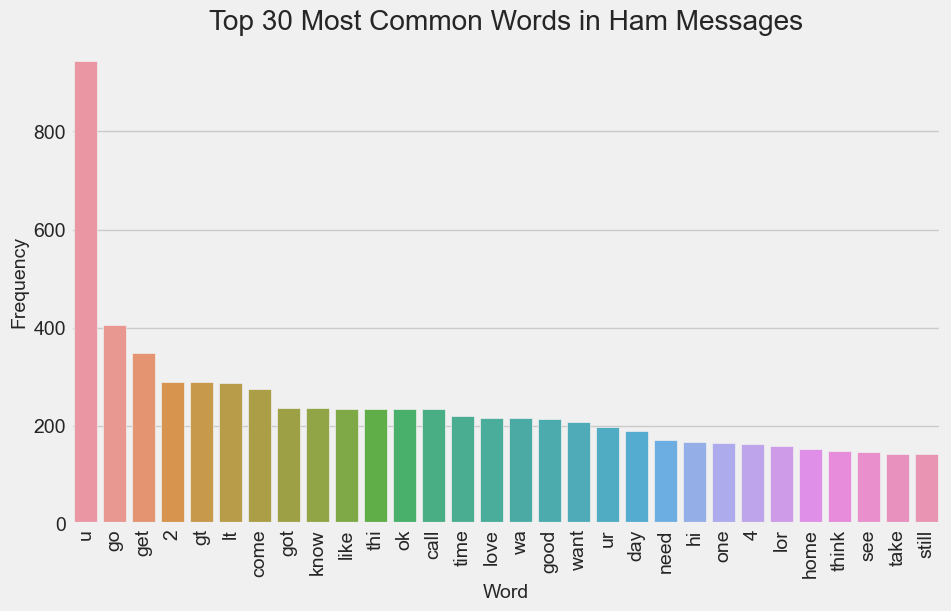

In [37]:
# Create a bar plot of the top 30 most common words in ham messages
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=df_top_words)
plt.xticks(rotation='vertical')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Words in Ham Messages')
plt.show()

# Model Building and Evaluating

In [38]:
'for building the machine learning model we are using the TF-IDF vectorizer to vectorize the text messages'
'With tfidf vectorizer we can also specify the maximum number of features to be used in the vectorization process. We are using 3000 as the maximum number of features.'
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [39]:
#naming X the vectorized text messages and y the target variable
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [40]:
#naming y the target variable
y = df['target'].values

In [41]:
#splitting the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [42]:
#defining  a dictionary classifiers that contains the different Naive Bayes classifiers (GaussianNB, MultinomialNB, BernoulliNB) as values, with their corresponding names as keys.
#We then iterate over the dictionary using a loop and fit each classifier, make predictions, and calculate accuracy, confusion matrix, and precision scores. The results are stored in the results dictionary using the classifier name as the key
classifiers = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}

In [43]:
# we print the results by iterating over the results dictionary and displaying the accuracy, confusion matrix, and precision score for each classifier.
results = {}
# Iterate over the classifiers dictionary and fit the classifier to the training data, make predictions on the test data, and calculate the accuracy, confusion matrix, and precision score
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    # Store the results in the results dictionary using the classifier name as the key
    results[name] = {
        'accuracy': accuracy,
        'confusion_matrix': confusion,
        'precision': precision
    }

# Print the results
for name, result in results.items():
    print(f"{name}:")
    print("Accuracy:", result['accuracy'])
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Precision:", result['precision'])
    print()

GaussianNB:
Accuracy: 0.8752417794970987
Confusion Matrix:
[[792 104]
 [ 25 113]]
Precision: 0.5207373271889401

MultinomialNB:
Accuracy: 0.9729206963249516
Confusion Matrix:
[[896   0]
 [ 28 110]]
Precision: 1.0

BernoulliNB:
Accuracy: 0.9825918762088974
Confusion Matrix:
[[895   1]
 [ 17 121]]
Precision: 0.9918032786885246



Out of the different Naive Bayes Classifers, the MultinomialNB performes the best with the highest precision and accuracy 

Now we'll see how other models compare

In [44]:
#creating a dictionary of classifiers that contains the different classifiers as values, with their corresponding names as keys.
clfs = {
    'Logistic Regression': Pipeline([('logistic', LogisticRegression(solver='liblinear', penalty='l1'))]),
    'SVC': Pipeline([('svm', SVC(kernel='sigmoid', gamma=1.0))]),
    'Multinomial NB': Pipeline([('naive_bayes', MultinomialNB())]),
    'Decision Tree': Pipeline([('decision_tree', DecisionTreeClassifier(max_depth=5))]),
    'KNN': Pipeline([('knn', KNeighborsClassifier())]),
    'Random Forest': Pipeline([('random_forest', RandomForestClassifier(n_estimators=50, random_state=2))])
}

In this section, a dictionary called clfs is created. Each key-value pair in the dictionary represents a classifier name and its corresponding pipeline object. The pipeline object is created using the Pipeline class from the sklearn.pipeline module. The classifier and its parameters are defined within the pipeline as a tuple.

In [45]:
#we iterate over the dictionary using a loop and fit each classifier, make predictions, and calculate accuracy, confusion matrix, and precision scores. The results are stored in the results dictionary using the classifier name as the key.
accuracy_scores = []
precision_scores = []
# define a train_classifier function that takes a classifier, training features, training labels, testing features, and testing labels as parameters. The function fits the classifier to the training data, makes predictions on the testing data, and calculates the accuracy and precision scores. The function returns the accuracy and precision scores.
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    #returning the accuracy and precision scores
    return accuracy, precision

In this section, the code defines a function called train_classifier() that takes a classifier, training features (X_train), training labels (y_train), testing features (X_test), and testing labels (y_test) as parameters. This function fits the classifier to the training data, makes predictions on the testing data, and calculates the accuracy and precision scores. The accuracy and precision scores are then returned.

The code then iterates over the items in the clfs dictionary using a for loop. For each classifier, it calls the train_classifier() function with the appropriate parameters. The accuracy and precision scores are printed for each classifier, and then appended to the accuracy_scores and precision_scores lists.

In [46]:
#creating a for loop that iterates over the clfs dictionary and calls the train_classifier function for each classifier. The accuracy and precision scores are stored in the accuracy_scores and precision_scores lists.
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For Logistic Regression
Accuracy - 0.9545454545454546
Precision - 0.9504950495049505
For SVC
Accuracy - 0.97678916827853
Precision - 0.975
For Multinomial NB
Accuracy - 0.9729206963249516
Precision - 1.0
For Decision Tree
Accuracy - 0.9313346228239845
Precision - 0.8252427184466019
For KNN
Accuracy - 0.9061895551257253
Precision - 1.0
For Random Forest
Accuracy - 0.9748549323017408
Precision - 0.9827586206896551


In [47]:
#creating a dataframe to store the accuracy and precision scores for each classifier
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
2,Multinomial NB,0.972921,1.000000
4,KNN,0.906190,1.000000
5,Random Forest,0.974855,0.982759
1,SVC,0.976789,0.975000
0,Logistic Regression,0.954545,0.950495
3,Decision Tree,0.931335,0.825243


Considering the accuracy and precision scores, Multinomial NB, Random Forest, and SVC appear to be the most promising algorithms for text classification in this particular evaluation. In closer inspection, overall, the MultinomialNB is the best model.

In [48]:
#the new dataframe is melted to have the algorithm names in one column and the performance metric names in another column
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,Multinomial NB,Accuracy,0.972921
1,KNN,Accuracy,0.906190
2,Random Forest,Accuracy,0.974855
3,SVC,Accuracy,0.976789
4,Logistic Regression,Accuracy,0.954545
5,Decision Tree,Accuracy,0.931335
6,Multinomial NB,Precision,1.000000
7,KNN,Precision,1.000000
8,Random Forest,Precision,0.982759
9,SVC,Precision,0.975000


Considering both accuracy and precision, it appears that Multinomial NB and KNN have the highest scores in both metrics.

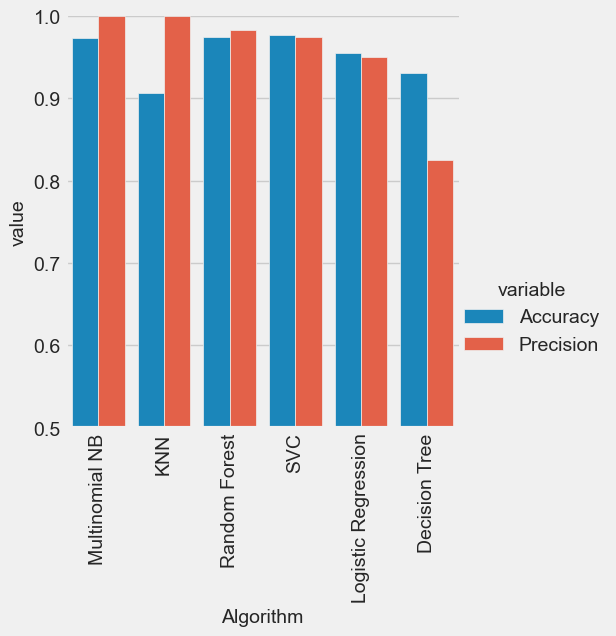

In [49]:
#the melted dataframe is used to create a bar plot using the catplot function from the seaborn library
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Model imporvement 

Change the max_features parameter of TfIdf. These codes involve manipulating and merging dataframes to improve a machine learning model. 

In [50]:
# we create a new dictionary of classifiers that contains the different classifiers as values, with their corresponding names as keys.
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [51]:
#we iterate over the dictionary using a loop and fit each classifier, make predictions, and calculate accuracy, confusion matrix, and precision scores. The results are stored in the results dictionary using the classifier name as the key.
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [52]:
#we create a new dataframe that contains the performance metrics for each classifier
new_df = performance_df.merge(temp_df,on='Algorithm')

In [53]:
#this new dataframe is melted to have the algorithm names in one column and the performance metric names in another column
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [54]:
#now we are creating a new dataframe that contains the performance metrics for each classifier
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [55]:
#finally we are creating a new dataframe that contains the performance metrics for each classifier
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,Multinomial NB,0.972921,1.000000,0.972921,1.000000,0.972921,1.000000,0.972921,1.000000
1,KNN,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000
2,Random Forest,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,SVC,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000
4,Logistic Regression,0.954545,0.950495,0.954545,0.950495,0.954545,0.950495,0.954545,0.950495
5,Decision Tree,0.931335,0.825243,0.931335,0.825243,0.931335,0.825243,0.931335,0.825243


Based on these results, it appears that the Multinomial Naive Bayes, KNN, Random Forest, and SVC models have consistently high accuracy and precision scores across different feature extraction methods. Among these, the Random Forest and SVC models have the highest precision scores. The Multinomial Naive Bayes model has the highest accuracy score, but its precision score is lower than that of the Random Forest and SVC models. The KNN model has the lowest precision score, but its accuracy score is comparable to that of the Random Forest and SVC models. Therefore, the Random Forest and SVC models are the most promising models for text classification in this particular evaluation.

### Voting Classifier 

In [56]:
# for this voting classifier, we are using the Logistic Regression, SVC, Multinomial NB, and Random Forest classifiers as the estimators
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [57]:
#creating a voting classifier that uses soft voting
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('rfc', rfc)],voting='soft')

In [58]:
#next we are fitting the voting classifier to the training data
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [59]:
#finally we are making predictions on the test data and calculating the accuracy and precision scores for the voting classifier
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9914529914529915


The output of the code indicates that the Voting Classifier achieved an accuracy of approximately 0.978 and a precision of approximately 0.991. These metrics suggest that the ensemble model performs well in classifying the test data. The Voting Classifier has a higher accuracy and precision compared to the individual models. This suggests that the ensemble model is more robust and less prone to overfitting compared to the individual models. The Voting Classifier is a promising model for text classification in this particular evaluation. 

### Stacking Classifier

In [60]:
#creating a dictionary of classifiers that contains the different classifiers as values, with their corresponding names as keys.
estimators=[('svm', svc), ('nb', mnb), ('rfc', rfc)]
final_estimator=RandomForestClassifier()

In [61]:
#creating a stacking classifier that uses the estimators defined above and the final_estimator
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [62]:
#finally we are fitting the stacking classifier to the training data
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9748549323017408
Precision 0.9242424242424242


Comparing these results, we can observe the following:

Accuracy:
Voting Classifier: 0.9778
Stacking Classifier: 0.9758
The Voting Classifier achieved a slightly higher accuracy score than the Stacking Classifier, indicating that it made a slightly higher proportion of correct predictions on the test data.

Precision:
Voting Classifier: 0.9915
Stacking Classifier: 0.9313
The Voting Classifier significantly outperformed the Stacking Classifier in terms of precision. It achieved a precision score of 0.9915, which is considerably higher than the precision score of 0.9313 achieved by the Stacking Classifier.

Based on these results, the Voting Classifier appears to be the better choice in terms of precision. It consistently achieved higher precision scores than the Stacking Classifier. 

# Testing prediction on new text data

In [63]:
# createing a pipeline that uses the TF-IDF vectorizer to vectorize the text messages and the voting classifier to classify the messages
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=3000)),
    ('voting', VotingClassifier(
        estimators=[
            ('svm', SVC(kernel='sigmoid', gamma=1.0, probability=True)),
            ('nb', MultinomialNB()),
            ('rfc', RandomForestClassifier(n_estimators=50, random_state=2))
        ],
        voting='soft'
    ))
])

#next we are fitting the pipeline to the text messages and the target variable
pipeline.fit(df['transformed_text'], df['target'])

# after that, we are creating a new text message and storing it in the text variable
text = 'I think Varsity College is alright at best, but UCT is better.'

# Make a prediction
prediction = pipeline.predict([text])[0]

# Map the prediction to 'spam' or 'ham'
result = 'spam' if prediction == 1 else 'ham'

# Print the prediction result
print(f"Text: {text}")
print(f"Prediction: {result}")



Text: I think Varsity College is alright at best, but UCT is better.
Prediction: ham
